In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv(".\diabetes.csv")
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [5]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [6]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
rf_params = {"max_depth": [0,1,3,5,10,15],"max_leaf_nodes": [0,2,4,6,7,10], "min_samples_split": [0,2,4,5,6], "n_estimators": [50,100,200]}

In [9]:
# AGACLAR HIZLI PARAMETRE TARAMASI YAPIYOR

In [8]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 540 candidates, totalling 5400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 1064 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 1512 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 1877 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 2760 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done 3814 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 5028 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 5400 out of 5400 | elapsed:  1.9min finished


In [10]:
rf_cv_model.best_params_

{'max_depth': 15,
 'max_leaf_nodes': 6,
 'min_samples_split': 2,
 'n_estimators': 200}

In [105]:
rf_tuned = RandomForestClassifier(max_depth = 15, max_leaf_nodes = 6, min_samples_split = 10, n_estimators = 200).fit(X_train, y_train)

In [106]:
y_pred = rf_tuned.predict(X_test)

In [107]:
accuracy_score(y_test, y_pred)

0.7705627705627706

# Importance of variables

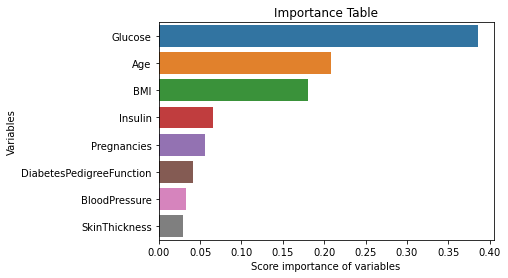

In [111]:
feature_imp = pd.Series(rf_tuned.feature_importances_, index = X_train.columns).sort_values(ascending = False)
import seaborn as sns

sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel("Score importance of variables")
plt.ylabel("Variables")
plt.title("Importance Table")
plt.show()